# Examen Interciclo Inteligencia Artificial

**Autor: Diego Tapia**

## Fase 1: Preparacion de los datos

In [1]:
# Importacion de librerias
#
!pip install scikeras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# nuevos imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#from imblearn.undermport Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#from sklearn import set_config_sampling import NearMiss
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Cargar dataframe desde url de csv alojado en repositorio de github
url_dataframe = '/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv'
# el separador es una (,) y la primera fila son los encabezados (header= 0)
dfOriginal = pd.read_csv(url_dataframe, sep=',', header=0)
dataframe = copy.deepcopy(dfOriginal)
print("Tamaño del dataset: "+str(dataframe.shape[0])+" filas x "+str(dataframe.shape[1])+" columnas")
# Se muestran las 10 primeros registros
dataframe.head(10)

Tamaño del dataset: 7043 filas x 21 columnas


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Eliminacion de variables

Se elimina la variable customerID, no se considera relevante para el análisis

In [4]:
dataframe=dataframe.drop(['customerID'], axis=1)
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Formato a las variables categorias
Variables como Parther, Dependents, o churn(variable objetivo/salida) que tienen valores de SI y NO, se cambian a binario no=0, si=1



In [5]:
columnas_a_transformar_01 = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling','Churn']

for column in columnas_a_transformar_01:
    dataframe[column] = dataframe[column].map({'Yes': 1, 'No': 0})


dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    5517 non-null   float64
 9   OnlineBackup      5517 non-null   float64
 10  DeviceProtection  5517 non-null   float64
 11  TechSupport       5517 non-null   float64
 12  StreamingTV       5517 non-null   float64
 13  StreamingMovies   5517 non-null   float64
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


Como se puede ver en la anterior celda, las  columnas OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies,tienen valores non-Null o NaN

In [7]:
columns_with_NaN = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns_with_NaN:
  print(dataframe[col].value_counts())

0.0    3498
1.0    2019
Name: OnlineSecurity, dtype: int64
0.0    3088
1.0    2429
Name: OnlineBackup, dtype: int64
0.0    3095
1.0    2422
Name: DeviceProtection, dtype: int64
0.0    3473
1.0    2044
Name: TechSupport, dtype: int64
0.0    2810
1.0    2707
Name: StreamingTV, dtype: int64
0.0    2785
1.0    2732
Name: StreamingMovies, dtype: int64


debido a que los valores de estas columnas representan Yes y No con 0 y 1, reemplazarlas con 0, no seria una buen idea ya que desbalancearia el dataset y consecuentemente la prediccion, por lo que los valores NaN seran tratados como "Desconocido" y se asignara el valor de -1, quedando la codificacion numerica de la siguiente forma:

Yes = 1

No = 0

Desconocido = -1

In [8]:
# Reemplazar NaN con -1 en las columnas seleccionadas usando applymap
dataframe[columns_with_NaN] = dataframe[columns_with_NaN].applymap(lambda x: -1 if pd.isna(x) else x)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [9]:
dataframe[columns_with_NaN].tail(10)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7033,0.0,0.0,0.0,0.0,0.0,0.0
7034,1.0,1.0,1.0,0.0,1.0,0.0
7035,0.0,0.0,0.0,0.0,1.0,0.0
7036,0.0,1.0,1.0,1.0,1.0,1.0
7037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7038,1.0,0.0,1.0,1.0,1.0,1.0
7039,0.0,1.0,1.0,0.0,1.0,1.0
7040,1.0,0.0,0.0,0.0,0.0,0.0
7041,0.0,0.0,0.0,0.0,0.0,0.0
7042,1.0,0.0,1.0,1.0,1.0,1.0


### Separacion de variable de salida

In [10]:
Y=dataframe['Churn']
dataframe=dataframe.drop(['Churn'], axis=1)
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85
1,Male,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5
2,Male,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15
3,Male,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75
4,Female,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65


0    5174
1    1869
Name: Churn, dtype: int64

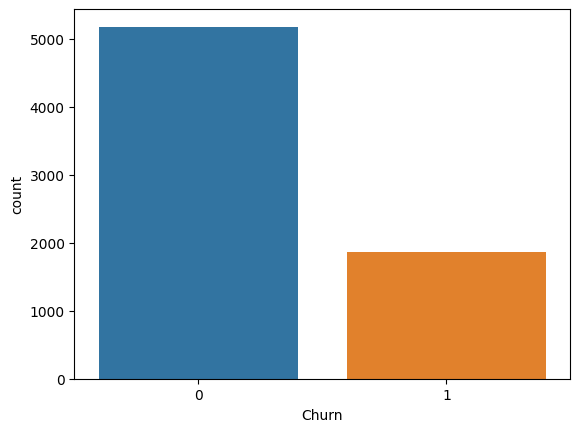

In [11]:
sns.countplot(x=Y)
Y.value_counts()

### Transformacion de variables

In [12]:
dataframe.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.069999,0.128212,0.127219,0.073548,0.167684,0.171234,0.592219,64.761692
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.491457,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000


In [13]:
# Se obtiene las variables categoricas, todas las que son de tipo object
columnas_categoricas = list(dataframe.select_dtypes(include=['object']).columns)
print(columnas_categoricas)

['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']


In [14]:
# Se obtienen las variables numéricas
columnas_numericas = list(dataframe.select_dtypes(include=['number']).columns)
print(columnas_numericas)

['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges']


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

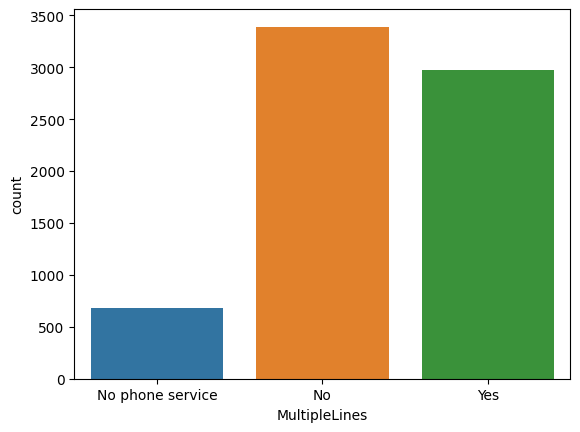

In [15]:
sns.countplot(x=dataframe['MultipleLines'])
dataframe['MultipleLines'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

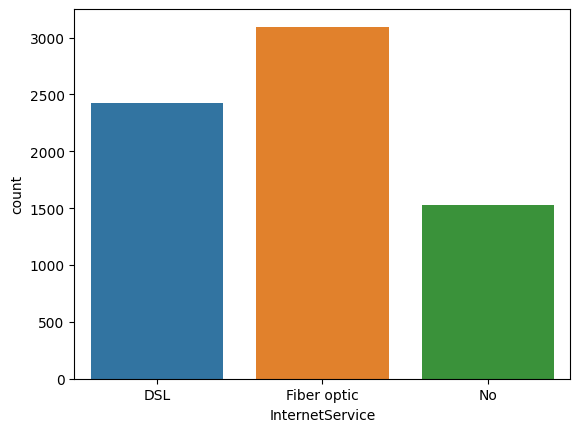

In [16]:
sns.countplot(x=dataframe['InternetService'])
dataframe['InternetService'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

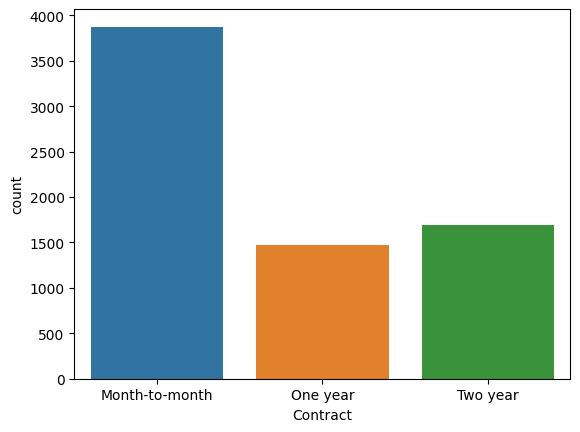

In [17]:
sns.countplot(x=dataframe['Contract'])
dataframe['Contract'].value_counts()

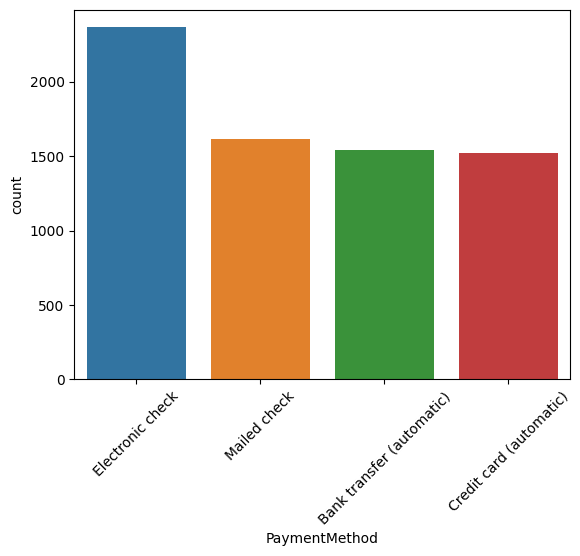

In [18]:
sns.countplot(x=dataframe['PaymentMethod'])
dataframe['PaymentMethod'].value_counts()
plt.xticks(rotation=45)  # Ajusta el ángulo de rotación
plt.show()

In [19]:

dataframe['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

TotalCharges es numerica, se procede a transformar

In [20]:
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'], errors='coerce')

# 'coerce' convierte los valores no numéricos a NaN

# Si hay valores NaN, se ponene en cero
dataframe['TotalCharges'] = dataframe['TotalCharges'].fillna(0)
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85
1,Male,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50
2,Male,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15
3,Male,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75
4,Female,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65


In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


#### Determinación de tipos de variables

In [22]:
# No se encuentran categoricas ordilnales
categorical_ordinal_features = []

categorical_nominal_features = ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

numeric_features = columnas_numericas

numeric_features.append('TotalCharges')

print("Variables categoricas ordinales: ",len(categorical_ordinal_features))
print(categorical_ordinal_features)

print("Variables categoricas nominales: ",len(categorical_nominal_features))
print(categorical_nominal_features)

print("Variables numericas: ",len(numeric_features))
print(numeric_features)

Variables categoricas ordinales:  0
[]
Variables categoricas nominales:  5
['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
Variables numericas:  14
['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


In [23]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns)
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [24]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  19
Cantidad de categorías en la variable categórica nominal gender : 2
Cantidad de categorías en la variable categórica nominal MultipleLines : 3
Cantidad de categorías en la variable categórica nominal InternetService : 3
Cantidad de categorías en la variable categórica nominal Contract : 3
Cantidad de categorías en la variable categórica nominal PaymentMethod : 4
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  15
Cantidad de variables que habrá después de la transformación de variables:  29


### Transformadores
Para las variables categoricas se usan los metodos de codificacion binari OneHotEncoder

Para las variables numericas se usa estandarización ya que como se vio anteriormente las variables numericas tienen escalas, medias y varianzas muy distintas.

In [25]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])

categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida

preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)


#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')



#### Pipeline

In [26]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    ('prepstandard', preprocesorStandardScaler)

])

In [27]:
pipe

Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('prepstandard',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transcaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28])]))])

### Transformacion de variables



In [28]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn"
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1]
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)

dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=",",index = False)

dataframeTransformado.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))]), ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'])
********** Lista de variables:
['gender_Female', 'gender_Male', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.009559,-1.009559,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,0.904184,-0.514249,...,-0.099148,1.180777,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,-1.160323,-0.992611,0
1,-0.990532,0.990532,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,-1.105970,1.944582,...,1.317281,-0.173655,1.182926,-0.10386,-0.22154,-0.225767,-1.205113,-0.259629,-0.172165,0
2,-0.990532,0.990532,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,0.904184,-0.514249,...,1.317281,1.180777,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,-0.362660,-0.958066,1
3,-0.990532,0.990532,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,-1.105970,1.944582,...,1.317281,-0.173655,1.182926,1.30827,-0.22154,-0.225767,-1.205113,-0.746535,-0.193672,0
4,1.009559,-1.009559,1.038066,-0.327438,-0.854176,-0.723740,1.129102,-0.525927,0.904184,-0.514249,...,-0.099148,-0.173655,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,0.197365,-0.938874,1


### Analisis de correlacion

In [29]:
dfCorrel=copy.deepcopy(dataframeTransformado)
dfCorrel=dfCorrel.corr()
dfCorrel.head()

,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender_Female,1.000000,-1.000000,-0.004476,-0.006488,0.008414,-0.006568,0.011286,-0.006026,0.003386,-0.008026,...,0.014418,0.012230,0.004720,0.009409,0.008673,0.010011,0.011754,0.014569,0.000080,0.008612
gender_Male,-1.000000,1.000000,0.004476,0.006488,-0.008414,0.006568,-0.011286,0.006026,-0.003386,0.008026,...,-0.014418,-0.012230,-0.004720,-0.009409,-0.008673,-0.010011,-0.011754,-0.014569,-0.000080,-0.008612
MultipleLines_No,-0.004476,0.004476,1.000000,-0.315431,-0.822853,-0.070179,-0.190192,0.310046,0.086740,0.002098,...,-0.278249,-0.321626,-0.328250,-0.280628,-0.340688,-0.345250,-0.151864,-0.338314,-0.396059,-0.032569
MultipleLines_No phone service,-0.006488,0.006488,-0.315431,1.000000,-0.279690,0.452425,-0.289999,-0.172209,0.000742,0.002791,...,0.159989,0.129770,0.142012,0.161930,0.108239,0.114715,-0.016505,-0.247398,-0.113214,-0.011942
MultipleLines_Yes,0.008414,-0.008414,-0.822853,-0.279690,1.000000,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,...,0.185711,0.247693,0.247064,0.186955,0.279872,0.280610,0.163530,0.490434,0.468504,0.040102


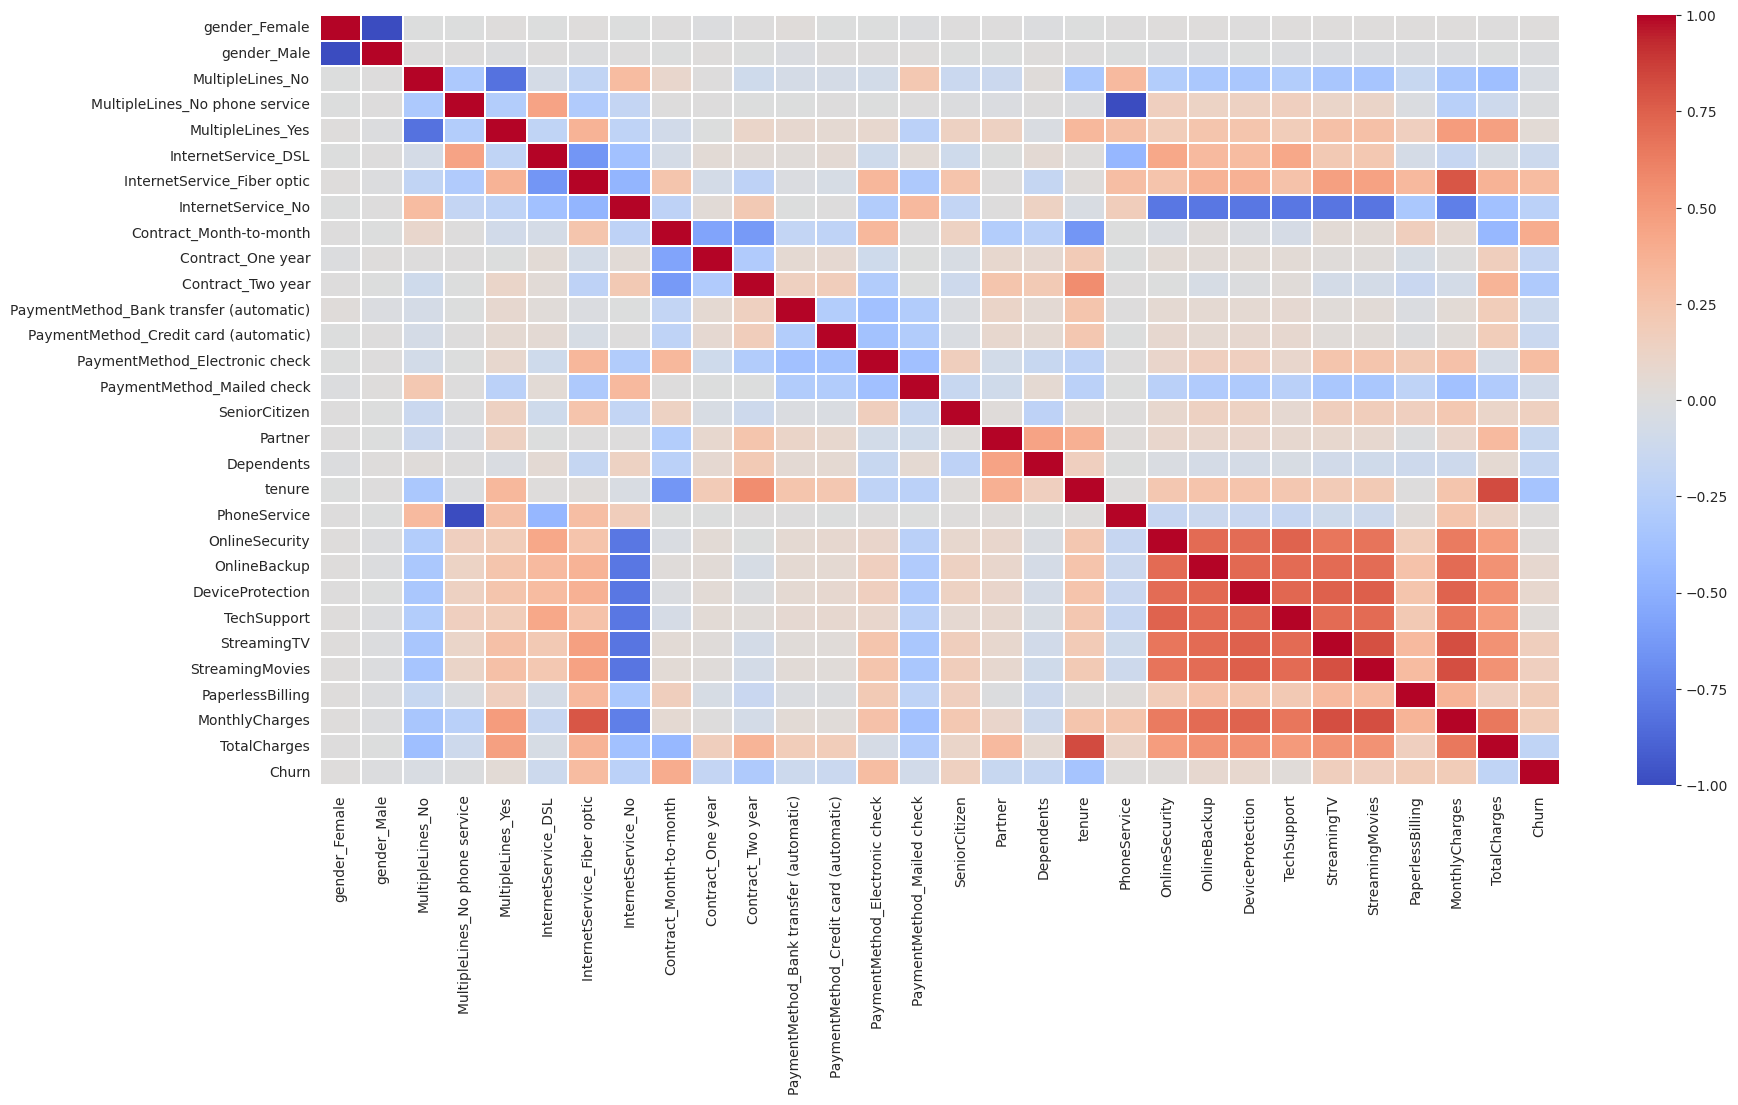

In [30]:
#Generar el mapa de calor de las correlaciones
mask = np.zeros_like(dfCorrel)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    #ax = sns.heatmap(dfCorrel, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
    #ax = sns.heatmap(dfCorrel, cmap ='viridis', linewidths = 0.30, annot = False)
    #ax = sns.heatmap(dfCorrel, cmap ='GnBu', linewidths = 0.30, annot = False)
    #ax = sns.heatmap(dfCorrel, cmap ='YlGnBu', linewidths = 0.30, annot = False)
    ax = sns.heatmap(dfCorrel, cmap='coolwarm', linewidths=0.30, annot=False)
#plt.savefig('attribute_correlations.png')

plt.show()

## Fase 2: Diseño de modelos de Predicción



## Red Neuronal

In [31]:
#Se identifica la cantidad de variables para crear la capa de entrada de la red neuronal
nombrePrep='prepstandard'
cantidadVariablesIndependientesNN = len(pipe.named_steps[nombrePrep].transformers_[0][2])
print("\nCantidad de variables después de preprocesamiento: ",cantidadVariablesIndependientesNN)


Cantidad de variables después de preprocesamiento:  29


### Modelo de la Red Neuronal

In [66]:
import keras
from keras.layers import Dense , PReLU

In [80]:
def build_model():
    model = Sequential()
    model.add(Dense(58, input_shape=(cantidadVariablesIndependientesNN,), activation=PReLU()))
    model.add(Dense(116, activation=PReLU()))  # Capa oculta
    model.add(Dense(116, activation=PReLU()))
    model.add(Dense(116, activation=PReLU()))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

modelo_NN_con_transformacion = build_model()
print("Modelo de la Red Neuronal Creado")

#Se inserta el modelo como paso final del pipeline
pipe.steps.append(['modelNN',modelo_NN_con_transformacion])
#pipe.steps.pop()
print("Cantidad de pasos: ",len(pipe.steps))
pipe.named_steps['modelNN'].summary()

Modelo de la Red Neuronal Creado
Cantidad de pasos:  3
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 58)                1798      
                                                                 
 dense_41 (Dense)            (None, 116)               6960      
                                                                 
 dense_42 (Dense)            (None, 116)               13688     
                                                                 
 dense_43 (Dense)            (None, 116)               13688     
                                                                 
 dense_44 (Dense)            (None, 1)                 117       
                                                                 
Total params: 36251 (141.61 KB)
Trainable params: 36251 (141.61 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________

### Entrenamiento red neuronal

In [86]:
X=copy.deepcopy(dataframe)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)#random_state = 0
pipe.fit(X_train, y_train, modelNN__epochs=100, modelNN__batch_size=1024, modelNN__verbose=1)

print('Modelo base entrenado')

Epoch 1/100
6/6 [==============================] - 0s 33ms/step - loss: 0.2732 - accuracy: 0.9129
Epoch 2/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1181 - accuracy: 0.9510
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.1025 - accuracy: 0.9539
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0943 - accuracy: 0.9574
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0901 - accuracy: 0.9585
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0937 - accuracy: 0.9569
Epoch 7/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0914 - accuracy: 0.9563
Epoch 8/100
6/6 [==============================] - 0s 24ms/step - loss: 0.1065 - accuracy: 0.9510
Epoch 9/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1009 - accuracy: 0.9531
Epoch 10/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0820 - accuracy: 0.9590
Epoch 11/100
6/6 [=

#### Resultado pruebas con distintos modelos de Red Neuronal y parametros; epochs, batchsize.
El accuracy que se muestra es el accuracy del ultimo epoch

| Modelo Red Neuronal| Epochs |Batchsize | Accuracy |
|-------------------------------------------------------|-----|-----|-----|
| 4 (ReLU) | 150 | 128 | 0.8032 |
| 29-58 (ReLU) | 150 | 128 | 0.8596 |
| 29-58 (ReLU) | 150 | 32 | 0.8965 |
| 58-58 (ReLU) | 150 | 32 | 0.9226 |
| 58-58 (ReLU) | 140 | 128 | 0.9418 |
| 58-116 (ReLU) | 140 | 128 | 0.9132 |
| 58-116 (ReLU) | 140 | 32 | 0.9412 |
| 58-116-116 (ReLU) | 140 | 32 | 0.9430 |
| 58-116-116 (ReLU) | 140 | 128 | 0.9675 |
| 58-116-116 (ReLU) | 140 | 256 | 0.9686 |
| 58-116-116 (ReLU) | 140 | 512 | 0.9730 |
| 58-116-116 (ReLU) | 150 | 1024 | 0.9636 |
| **58-116-116 (ReLU)** | **150** | **2048** | **0.9579** |
| 58-116-116-58 (ReLU) | 200 | 2048 | 0.8722 |
| 58-116-116-58 (ReLU) | 140 | 1024 | 0.9404 |
| 58-116-116-58 (ReLU) | 150 | 512 | 0.9542 |
| 58-116-116-116 (ReLU) | 150 | 512 | 0.9091 |
| 58-116-116-116 (ReLU) | 150 | 1024 | 0.9641 |
| 58-116-116(PReLU) | 150 | 1024 | 0.8834 |
| 58-116-116 (PReLU) | 150 | 512 | 0.9343 |
| 58-116-116(PReLU) | 150 | 256 | 0.9507 |
| 58-116-116 (PReLU) | 150 | 128 | 0.9570 |
| 58-116-116-116 (PReLU) | 100 | 64 | 0.9544 |
| 58-116-116-116 (PReLU) | 100 | 1024 | 0.9488 |
| **58-116-116-116 (PReLU)** | **100** | **1024** | **0.9682** |



### Prediccion con el conjunto de Test

In [51]:
# Función para transformar la predicción
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio=lista[i]
        #print(desempenio)
        if (desempenio < 0.5):
            desempenio = 0
        elif (desempenio >= 0.5):
            desempenio = 1
        lista[i]=desempenio
    return lista

In [87]:
y_pred = pipe.predict(X_test)
y_pred = y_pred.flatten()
y_pred = transformarPrediccion(y_pred)
dataframeFinal_NN=pd.DataFrame({'real':y_test, 'predicción clase': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal_NN.head(10)

45/45 [==============================] - 0s 2ms/step


,real,predicción clase
3418,0,0.0
6224,0,0.0
1284,0,0.0
354,1,1.0
3180,0,0.0
2585,0,0.0
634,0,0.0
4530,0,0.0
3844,1,0.0
4166,0,0.0


### Evaluacion de la calidad del Modelo

Mean Absolute Error (MAE): 0.0979
Mean Squared Error (MSE): 0.0979
Root Mean Squared Error (RMSE): 0.313
Accuracy: 0.9020581973030518
Precision:  0.8151
Recall:  0.8017
F1: 0.8083
Matriz de confusión:
Verdaderos negativos:  980  Falsos positivos:  66  Falsos negativos:  72  Verdaderos positivos:  291


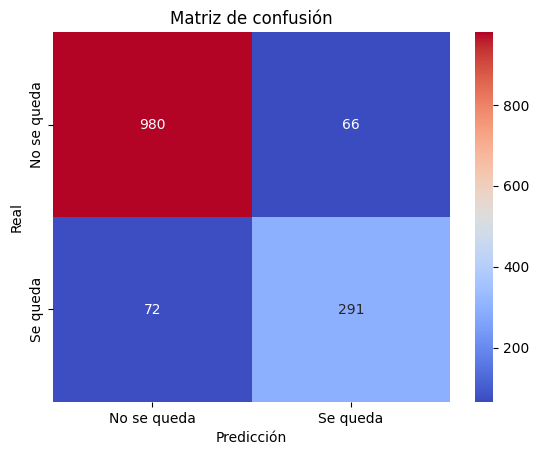

In [89]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)

y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

#y_pred=y_pred.flatten()# de 2D a 1D

accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
print('Accuracy: ' + accuracyModeloBase)

precision=precision_score(y_testBinario, y_predBinario)
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_testBinario, y_predBinario)
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_testBinario, y_predBinario)
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()
print('Verdaderos negativos: ',tn,' Falsos positivos: ',fp,' Falsos negativos: ',fn,' Verdaderos positivos: ',tp)

from sklearn.metrics import confusion_matrix
labels = ['No se queda', 'Se queda']
cm = confusion_matrix(y_testBinario, y_predBinario)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='coolwarm', fmt='g');
ax.set_xlabel('Predicción');ax.set_ylabel('Real');
ax.set_title('Matriz de confusión');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### Prediccion nuevo cliente con Red Neuronal

In [90]:
#Esta es la función para calcular la certeza (confianza o probabilidad) asociada a la predicción de clase
def obtenerResultadosyCertezas(lista):
    predicciones=lista
    marcas=[]
    certezas=[]
    nuevomax=1
    nuevomin=0
    marca=-1
    certeza=-1
    for i in range(len(lista)):
        prediccion=lista[i]
        if (prediccion < 0.5):
            marca = 'No se queda'
            maxa=0.5
            mina=0
            certeza=1-((prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin)
            certeza=str(int((certeza)*100))+'%'
        elif (prediccion >= 0.5):
            marca = 'Se queda'
            maxa=1
            mina=0.5
            certeza=(prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin
            certeza=str(int((certeza)*100))+'%'
        marcas.append(marca)
        certezas.append(certeza)
    return prediccion, marcas, certezas

In [91]:
def predecirNuevoCliente(gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges):
    cnames = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                'MonthlyCharges', 'TotalCharges']

    Xnew=[gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges]
    Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)

    y_pred=pipe.predict(Xnew_Dataframe)[0].tolist()
    predicciones, marcas, certezas= obtenerResultadosyCertezas(y_pred)
    dataframeFinal_pred=pd.DataFrame({'Predicción':predicciones, 'Resultado':marcas, 'Certeza': certezas})
    np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
    return dataframeFinal_pred



In [92]:
dataframe_nueva_prediccion=predecirNuevoCliente(gender='Female', SeniorCitizen=0, Partner=1, Dependents=0, tenure=12,
                 PhoneService=1, MultipleLines='No', InternetService='Fiber optic', OnlineSecurity=0,
                 OnlineBackup=0, DeviceProtection=0, TechSupport=0, StreamingTV=0,
                 StreamingMovies=0, Contract='Month-to-month', PaperlessBilling=1,
                 PaymentMethod='Electronic check', MonthlyCharges=64, TotalCharges=768)
dataframe_nueva_prediccion.head()

1/1 [==============================] - 0s 33ms/step


,Predicción,Resultado,Certeza
0,0.035788,No se queda,92%


In [97]:
dataframe_nueva_prediccion2=predecirNuevoCliente(gender='Female', SeniorCitizen=0, Partner=1, Dependents=1, tenure=12,
                 PhoneService=1, MultipleLines='No', InternetService='Fiber optic', OnlineSecurity=0,
                 OnlineBackup=0, DeviceProtection=1, TechSupport=0, StreamingTV=1,
                 StreamingMovies=1, Contract='Month-to-month', PaperlessBilling=1,
                 PaymentMethod='Electronic check', MonthlyCharges=64, TotalCharges=768)
dataframe_nueva_prediccion2.head()

1/1 [==============================] - 0s 32ms/step


,Predicción,Resultado,Certeza
0,0.999729,Se queda,99%


## KNN

### Diseño de Pipeline

Se usa los mismos transformadores que se utilizaron para el modelo de la red neuronal

Se crea un nuevo Pipeline

In [98]:
#Construcción de Pipeline con transformadores
pipe_knn = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    ('prepstandar', preprocesorStandardScaler )
])

In [101]:
pipe_knn

Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('prepstandar',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transcaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28])]))])

### Transformación de variables

In [100]:
X_Transformado = pipe_knn.fit_transform(dataframe)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe_knn.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn"
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1]
    cnamesDataset2 = pipe_knn.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Lista de variables:')
print(cnamesDataset1)
dataframe_transformado_KNN = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
#dataframe_transformado_KNN.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";",index = False)
#Se agrega la variable de salida (etiquetas) al final
dataframe_transformado_KNN = pd.concat([dataframe_transformado_KNN, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
#dataframe_transformado_KNN.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";",index = False)
dataframe_transformado_KNN.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))]), ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'])
********** Lista de variables:
['gender_Female', 'gender_Male', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.009559,-1.009559,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,0.904184,-0.514249,...,-0.099148,1.180777,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,-1.160323,-0.992611,0
1,-0.990532,0.990532,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,-1.105970,1.944582,...,1.317281,-0.173655,1.182926,-0.10386,-0.22154,-0.225767,-1.205113,-0.259629,-0.172165,0
2,-0.990532,0.990532,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,0.904184,-0.514249,...,1.317281,1.180777,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,-0.362660,-0.958066,1
3,-0.990532,0.990532,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,-1.105970,1.944582,...,1.317281,-0.173655,1.182926,1.30827,-0.22154,-0.225767,-1.205113,-0.746535,-0.193672,0
4,1.009559,-1.009559,1.038066,-0.327438,-0.854176,-0.723740,1.129102,-0.525927,0.904184,-0.514249,...,-0.099148,-0.173655,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,0.197365,-0.938874,1


### Diseño y optimización del modelo KNN
En esta sección se evalúa el método KNN con distintos valores de parámetros. El código itera a través de diferentes distancias (por ejemplo, euclidiana, manhattan, chebyshev) y diferentes valores de K (10, 20, 30, 40, ..., 100) para evaluar el rendimiento del modelo. Se calculan varias métricas de rendimiento, como: Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE), Accuracy (ACC), Precision, Recall (Sensibilidad) y F1-Score. Estas métricas miden el rendimiento del modelo en la clasificación de datos. Se ejecuta N experimentos por cada valor de K. Luego, se calcula el promedio de los N experimentos.

In [102]:
Y = dataframe_transformado_KNN['Churn']
dataframe_transformado_KNN = dataframe_transformado_KNN.drop(['Churn'], axis=1)
dataframe_transformado_KNN.head()

,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,...,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
0,1.009559,-1.009559,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,0.904184,-0.514249,...,-3.054010,-0.099148,1.180777,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,-1.160323,-0.992611
1,-0.990532,0.990532,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,-1.105970,1.944582,...,0.327438,1.317281,-0.173655,1.182926,-0.10386,-0.22154,-0.225767,-1.205113,-0.259629,-0.172165
2,-0.990532,0.990532,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,0.904184,-0.514249,...,0.327438,1.317281,1.180777,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,-0.362660,-0.958066
3,-0.990532,0.990532,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,-1.105970,1.944582,...,-3.054010,1.317281,-0.173655,1.182926,1.30827,-0.22154,-0.225767,-1.205113,-0.746535,-0.193672
4,1.009559,-1.009559,1.038066,-0.327438,-0.854176,-0.723740,1.129102,-0.525927,0.904184,-0.514249,...,0.327438,-0.099148,-0.173655,-0.172426,-0.10386,-0.22154,-0.225767,0.829798,0.197365,-0.938874


In [104]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier #KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [107]:
# Crear un DataFrame vacío con las columnas deseadas
columnas = ['DISTANCE', 'K', 'ACC', 'PRECISION', 'RECALL', 'F1-SCORE']

# Definir el tipo de dato de cada columna
tipos_de_variable = [str, int, float, float, float, float]

model_KNN = None

# Definir las distancias a calcular
DISTANCE = ['euclidean', 'manhattan', 'chebyshev']

# Definir los valores de K (la cantidad de vecinos que conforman el vecindario)
K = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
valoresK = K

# Definir la cantidad de experimentos que se repiten por cada valor de K. Luego, se calculará el promedio de K experimentos
def realizar_experimentos(dataframe_transformado_KNN, Y, nExperimentos):

    # Crear un DataFrame vacío, a este dataframe se agregarán fila a fila los resultados de KNN
    dataResultados = pd.DataFrame(columns=columnas)

    for idexp in range(nExperimentos):
        # Crear las particiones del conjunto de datos. De manera convencional, el conjunto de test contiene el 20% de los datos.
        X_train, X_test, y_train, y_test = train_test_split(dataframe_transformado_KNN, Y, test_size=0.2)
        for d in DISTANCE:
            for k in K:
                model_KNN = KNeighborsClassifier(n_neighbors=k, metric=d)
                # Entrenar el modelo
                history = model_KNN.fit(X_train, y_train)
                # Calcular predicciones para el conjunto de Test
                y_pred = model_KNN.predict(X_test)
                y_pred = y_pred.flatten()
                # Transformar salida continua a discreta (binaria)
                y_pred = transformarPrediccion(y_pred)
                # Evaluar el modelo con medidas de calidad
                MAE = metrics.mean_absolute_error(y_test, y_pred)
                MSE = metrics.mean_squared_error(y_test, y_pred)
                RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                y_testBinario = (y_test >= 0.5).astype("int32")
                y_predBinario = (y_pred >= 0.5).astype("int32")
                ACC = float(str(accuracy_score(y_testBinario, y_predBinario)))
                precision = precision_score(y_testBinario, y_predBinario)
                recall = recall_score(y_testBinario, y_predBinario)
                f1 = f1_score(y_testBinario, y_predBinario)
                MAE = float(str(round(MAE, 4)))
                MSE = float(str(round(MSE, 4)))
                RMSE = float(str(round(RMSE, 4)))
                precision = float(str(round(precision, 4)))
                recall = float(str(round(recall, 4)))
                f1 = float(str(round(f1, 4)))
                valor = [d, k, ACC, precision, recall, f1]
                # print(valor)
                fila = pd.Series(valor, index=columnas)
                # Agregar los resultados en el dataframe
                dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

    # Convertir el tipo de datos de cada columna
    dataResultados['K'] = dataResultados['K'].astype(int)
    dataResultados['ACC'] = dataResultados['ACC'].astype(float)
    dataResultados['PRECISION'] = dataResultados['PRECISION'].astype(float)
    dataResultados['RECALL'] = dataResultados['RECALL'].astype(float)
    dataResultados['F1-SCORE'] = dataResultados['F1-SCORE'].astype(float)
    dataResultados = dataResultados.sort_values(by=['DISTANCE', 'K'])
    dataResultados = dataResultados.reset_index(drop=True)

    return dataResultados

Se prueba el modelo KNN con valores de K = [10,20,30 ..., 100] y con las distacias; euclidian, manhattan y chebyshev, se realizaran un total de 20 experimentos para cada K y distancia.


In [108]:
resultados_20_exp = realizar_experimentos(dataframe_transformado_KNN, Y, 20)
resultados_20_exp.head()

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.777147,0.6508,0.4205,0.5109
1,chebyshev,10,0.768630,0.5836,0.4560,0.5120
2,chebyshev,10,0.760114,0.5870,0.4422,0.5044
3,chebyshev,10,0.774308,0.6079,0.4471,0.5152
4,chebyshev,10,0.779276,0.6056,0.4176,0.4943


### Resultados por medida de distancia y cantidad de vecinos (K)

Se agrupa los resultados por medida de distancia y cantidad de vecinos. Se puede apreciar los resultados de 20 experimentos por cada valor de K.

In [114]:
resultados_20_exp_agrupado = resultados_20_exp.groupby(['DISTANCE','K'])
resultados_20_exp_agrupado.head()

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.777147,0.6508,0.4205,0.5109
1,chebyshev,10,0.768630,0.5836,0.4560,0.5120
2,chebyshev,10,0.760114,0.5870,0.4422,0.5044
3,chebyshev,10,0.774308,0.6079,0.4471,0.5152
4,chebyshev,10,0.779276,0.6056,0.4176,0.4943
...,...,...,...,...,...,...
580,manhattan,100,0.804826,0.6657,0.5923,0.6269
581,manhattan,100,0.782115,0.5890,0.6000,0.5945
582,manhattan,100,0.782825,0.6125,0.5810,0.5963
583,manhattan,100,0.788502,0.6117,0.5794,0.5951


Se calcula el promedio de los 20 experimentos

In [115]:
resultados_20_exp_promedio = resultados_20_exp_agrupado.mean()
resultados_20_exp_promedio = resultados_20_exp_promedio.reset_index()
resultados_20_exp_promedio = resultados_20_exp_promedio.reset_index(drop=True)
resultados_20_exp_promedio = resultados_20_exp_promedio.groupby(['DISTANCE'])
resultados_20_exp_promedio.head()

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.774911,0.601425,0.437755,0.506150
1,chebyshev,20,0.777147,0.602055,0.459790,0.520945
2,chebyshev,30,0.779312,0.607465,0.462685,0.524850
3,chebyshev,40,0.781299,0.606135,0.489785,0.541335
4,chebyshev,50,0.780589,0.599895,0.506925,0.548895
10,euclidean,10,0.776721,0.601605,0.457540,0.519170
11,euclidean,20,0.785628,0.612625,0.511740,0.557055
12,euclidean,30,0.786231,0.609830,0.528460,0.565800
13,euclidean,40,0.784954,0.603945,0.537615,0.568430
14,euclidean,50,0.785131,0.603225,0.541690,0.570375


### Visualización de resultados

Visualización de resultados con 20 experimentos.

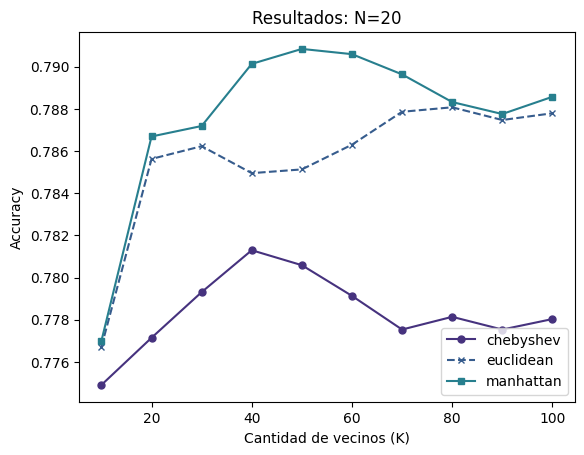

In [117]:
sns.set_palette("viridis")
for name in resultados_20_exp_promedio.groups.keys():
    group = resultados_20_exp_promedio.get_group(name)
    #print(name)
    valores=group.ACC.values.tolist()
    #print(valores)
    #SIN EFECTO SUAVIZADO
    if name=='euclidean': plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label = name)
    if name=='manhattan': plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label = name)
    if name=='chebyshev': plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label = name)
    plt.title("Resultados: N=20")
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")

### Mejor K y distancia
A partir de los resultados anteriores se selecciona el "mejor K": **K = 50** con la distancia **Manhattan** con un accuracy ACC = 0.7908



### Modelo optimizado con el mejor K y distancia
Se entrena el modelo con el mejor K seleccionado (K=50) y con la mejor distancia: "manhattan"

In [123]:
#Construcción de modelo KNN
modelo_KNN=KNeighborsRegressor(n_neighbors=50, metric='manhattan')
X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
modelo_KNN.fit(X_train, y_train)
print('Modelo entrenado')

(5634, 29) (5634,)
(1409, 29) (1409,)
Modelo entrenado


In [139]:
#Se inserta el modelo como paso final del pipeline
pipe_knn.steps.append(['modelKNN',modelo_KNN])
#pipe_knn.steps.pop()
print("Cantidad de pasos: ",len(pipe_knn.steps))


Cantidad de pasos:  3


In [141]:
pipe_knn

Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('prepstandar',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transcaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28])])),
                ['modelKNN',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=50)]])

### Predicción con el modelo KNN con el conjunto de Test

In [124]:
y_pred = modelo_KNN.predict(X_test)
y_pred = y_pred.flatten()
y_pred = transformarPrediccion(y_pred)
dataframeFinal_KNN_con_transformacion=pd.DataFrame({'real':y_test, 'predicción clase': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal_KNN_con_transformacion.head(10)

,real,predicción clase
1181,1,0.0
1727,0,0.0
1238,1,1.0
5893,0,0.0
6079,0,0.0
6969,1,0.0
4516,0,0.0
565,0,0.0
4309,0,1.0
1065,1,1.0


### Evaluación de la calidad del modelo KNN

Mean Absolute Error (MAE): 0.23
Mean Squared Error (MSE): 0.23
Root Mean Squared Error (RMSE): 0.4795
Accuracy: 0.7700496806245565
Precision:  0.5674
Recall:  0.5824
F1: 0.5748
Matriz de confusión:
Verdaderos negativos:  866  Falsos positivos:  167  Falsos negativos:  157  Verdaderos positivos:  219


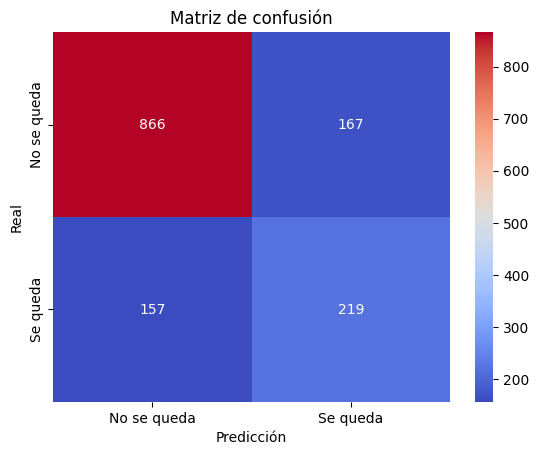

In [125]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)

y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

#y_pred=y_pred.flatten()# de 2D a 1D

accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
print('Accuracy: ' + accuracyModeloBase)

precision=precision_score(y_testBinario, y_predBinario)
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_testBinario, y_predBinario)
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_testBinario, y_predBinario)
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()
print('Verdaderos negativos: ',tn,' Falsos positivos: ',fp,' Falsos negativos: ',fn,' Verdaderos positivos: ',tp)

from sklearn.metrics import confusion_matrix
labels = ['No se queda', 'Se queda']
cm = confusion_matrix(y_testBinario, y_predBinario)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='coolwarm', fmt='g');
ax.set_xlabel('Predicción');ax.set_ylabel('Real');
ax.set_title('Matriz de confusión');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### Predicción nuevo cliente con KNN

In [144]:
#Esta es la función para calcular la certeza (confianza o probabilidad) asociada a la predicción de clase
def obtenerResultadosyCertezas(lista):
    predicciones=lista
    marcas=[]
    certezas=[]
    nuevomax=1
    nuevomin=0
    marca=-1
    certeza=-1
    for i in range(len(lista)):
        prediccion=lista[i]
        if (prediccion < 0.5):
            marca = 'No se queda'
            maxa=0.5
            mina=0
            certeza=1-((prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin)
            certeza=str(int((certeza)*100))+'%'
        elif (prediccion >= 0.5):
            marca = 'Se queda'
            maxa=1
            mina=0.5
            certeza=(prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin
            certeza=str(int((certeza)*100))+'%'
        marcas.append(marca)
        certezas.append(certeza)
    return prediccion, marcas, certezas

In [145]:
def predecirNuevoClienteKNN(gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges):
    cnames = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                'MonthlyCharges', 'TotalCharges']

    Xnew=[gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges]
    Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)

    y_pred=pipe_knn.predict(Xnew_Dataframe)
    predicciones, marcas, certezas= obtenerResultadosyCertezas(y_pred)
    dataframeFinal_pred=pd.DataFrame({'Predicción':predicciones, 'Resultado':marcas, 'Certeza': certezas})
    np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
    return dataframeFinal_pred

In [151]:
dataframe_nueva_prediccion=predecirNuevoClienteKNN(gender='Female', SeniorCitizen=0, Partner=1, Dependents=0, tenure=12,
                 PhoneService=1, MultipleLines='No', InternetService='Fiber optic', OnlineSecurity=0,
                 OnlineBackup=0, DeviceProtection=0, TechSupport=0, StreamingTV=0,
                 StreamingMovies=0, Contract='Month-to-month', PaperlessBilling=1,
                 PaymentMethod='Electronic check', MonthlyCharges=64, TotalCharges=768)
dataframe_nueva_prediccion.head()

,Predicción,Resultado,Certeza
0,0.54,Se queda,8%


In [152]:
dataframe_nueva_prediccion=predecirNuevoClienteKNN(gender='Female', SeniorCitizen=0, Partner=1, Dependents=1, tenure=12,
                 PhoneService=1, MultipleLines='No', InternetService='Fiber optic', OnlineSecurity=0,
                 OnlineBackup=0, DeviceProtection=1, TechSupport=0, StreamingTV=1,
                 StreamingMovies=1, Contract='Month-to-month', PaperlessBilling=1,
                 PaymentMethod='Electronic check', MonthlyCharges=64, TotalCharges=768)
dataframe_nueva_prediccion.head()

,Predicción,Resultado,Certeza
0,0.62,Se queda,24%


## CONCLUSIONES



Para este dataset el mejor modelo de predicción es una red neuronal. Sin embargo, esto podría ser diferente si se aplican técnicas de balanceo de datos o se prueban otros transformadores (Normalizacion, Scaling).

### Red Neuronal

No siempre tener un buen valor de accuracy al momento de entrenar una red neuronal significa que se tendrá un valor de accuracy similar a la hora de probar con el conjunto de testing. Esto se puede apreciar en la tabla 1 donde se puede ver que el modelo escogido tiene un accuracy de 0.9682 pero a la hora de realizar la predicción con el conjunto de testing se tiene un accuracy de 0.902, si bien es un valor alto se esperaba uno similar al que se obtuvo al entrenar. Esto podría solucionarse aplicando Kfolding.

Al tener valores negativos en el dataset transformado, se pensó que la función ReLu no sería la más adecuada, por lo que investigando se encontró que existe una variante que considera los valores negativos PReLU y generalmente se usa cuando hay valores negativos muy altos, en este dataset al entrenar la red neuronal con esta función de activación, hubo mejora, pero no fue muy significativa.

Al incrementar los valores del batchsize a la hora de entrenar el modelo, se pudo notar que el modelo se entrenaba mas rápido, pero esto requiere mas capacidad de procesamiento, algo que no se pudo percibir ya que se trabajo en un entorno online (Google Colab).

Utilizar valores de batchsize que sean potencia de dos, es decir, 32,64,128…1024, etc. Mejora la eficiencia a la hora de entrenar un modelo ya que las librerías están optimizadas para trabajar con batchsizes que son potencia de 2.

### KNN

A partir de prácticas anteriores se observó que con 20 experimentos se obtuvo el mejor K, por lo que en esta se realzaron 20 experimentos directamente. 
A diferencia de la red neuronal el accuracy que se obtuvo con el conjunto de entrenamiento (0.79) no difiere mucho del accuracy con el conjunto de testing (0.77).
Debido a las diferencias de escalas entre los datos puede que KNN no sea lo mejor para realizar predicciones en este caso, pero como se menciono al inicio, puede que esto cambie si se aplican otras técnicas de transformación y quizá eliminando valores atípicos.


## Referencias

Ortiz, I. R. H., PhD. (2023c, November 15). Análisis y transformación de variables categóricas, clasificación y optimización (fine tuning) con redes neuronales - préstamos en instituciones bancarias - GenSciNet. GenSciNet. https://genscinet.com/variables-categoricas-redes-neuronales-prestamos/

Soberanis, M. C. (2021, December 24). Introducción al Deep Learning I: Funciones de Activación. Medium. https://medium.com/soldai/introducci%C3%B3n-al-deep-learning-i-funciones-de-activaci%C3%B3n-b3eed1411b20#:~:text=Otras%20funciones%20de%20activaci%C3%B3n&text=La%20PRELU%20introduce%20un%20par%C3%A1metro,0%20y%20acelerando%20la%20convergencia.

Telco Customer churn. (2018, February 23). Kaggle. https://www.kaggle.com/datasets/blastchar/telco-customer-churn
